In [1]:
# Packages
import h5py
import numpy as np
from amuse.units import units
import matplotlib.pyplot as plt

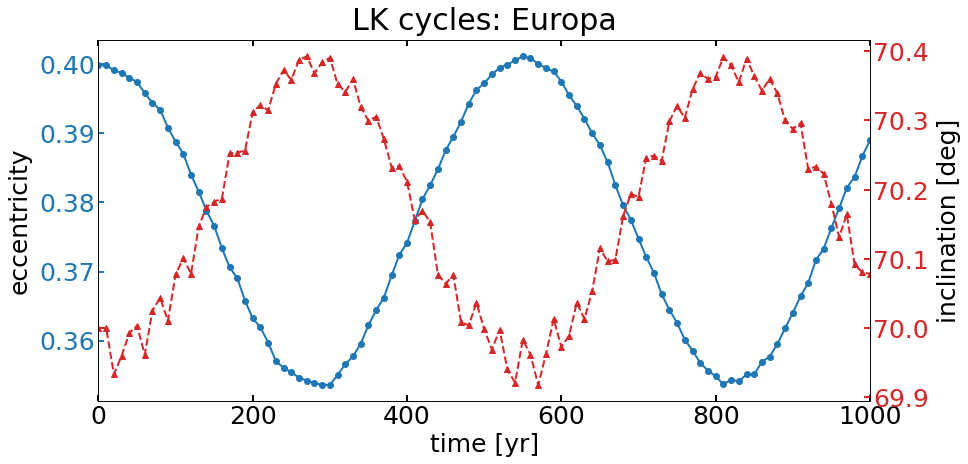

In [12]:
def LK_demo_Europa(savefig=False):
    
    moon = 'Europa'
    res = h5py.File('LK_demo_europa.hdf5', 'r')
    ecc = res['ecc'][:]
    inc = res['inc'][:]
    t = res['time'][:]
    
    plt.rcParams.update({'font.size': 25})
    fig, ax = plt.subplots(1, figsize=(14, 7), tight_layout=True)
    
    ax.set_title('LK cycles: {}'.format(moon), pad=10)
    ax.plot(t, ecc, lw=2, c='tab:blue')
    ax.scatter(t, ecc, c='tab:blue')
    ax.set_xlabel('time [yr]')
    
    ax1 = ax.twinx()
    ax1.plot(t, inc, lw=2, ls='--', c='tab:red')
    ax1.scatter(t, inc, c='tab:red', marker='^')
    
    ax.tick_params(direction='in', length=6, width=2, top=True)
    ax.tick_params(axis='y', colors='tab:blue')
    ax.set_ylabel('eccentricity', labelpad=20, rotation=90, 
                  horizontalalignment='center', verticalalignment='center')

    ax1.tick_params(direction='in', length=6, width=2)
    ax1.tick_params(axis='y', colors='tab:red')
    ax1.set_ylabel('inclination [deg]', labelpad=20, rotation=90, 
                   horizontalalignment='center', verticalalignment='center')
    
    ax.set_xlim([0,1000])
    ax1.set_xlim([0,1000])
    
    if savefig:
        plt.savefig('LK_cycles_europa.png', facecolor='w', bbox_inches='tight', dpi=300)
        
    plt.show()
    res.close()
    
    
LK_demo_Europa()

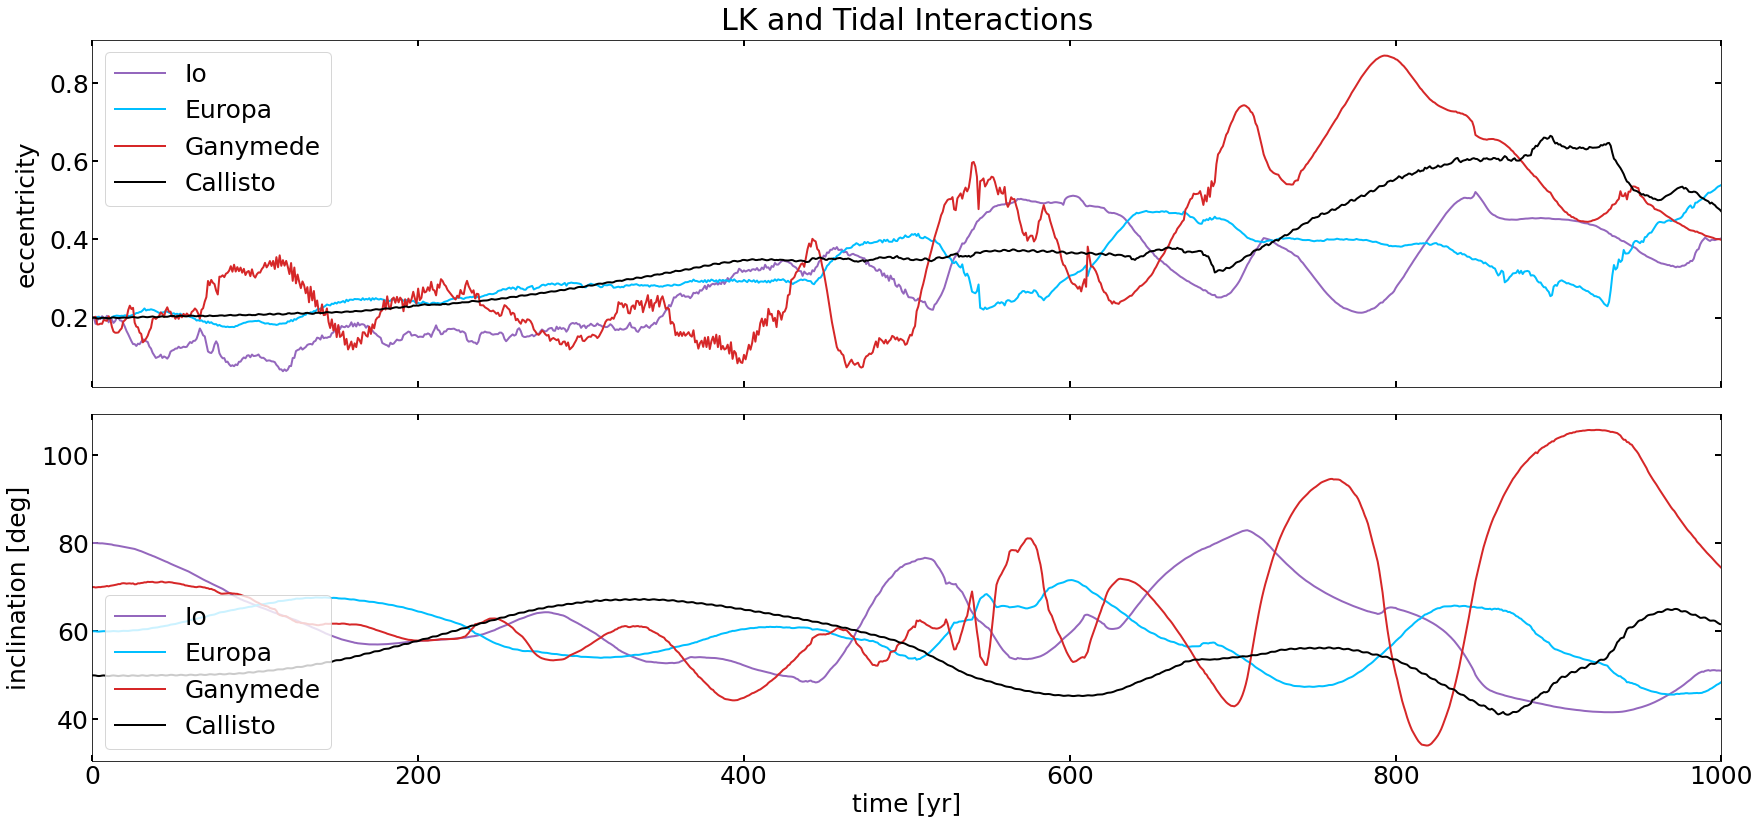

In [16]:
def LK_demo_full_system(savefig=False):
    
    res = h5py.File('LK_demo_full_system.hdf5', 'r')
    
    plt.rcParams.update({'font.size': 25})
    fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(25, 12), tight_layout=True, sharex=True)
    
    moons = list(res.keys())
    moons.reverse()
    props = list(res[moons[0]].keys())
    time = res[moons[0]][props[3]][:]
    
    labels = ['Io', 'Europa', 'Ganymede', 'Callisto']
    lines = ['-', '--', '-.', ':']
    cb = ['tab:purple', 'deepskyblue', 'tab:red', 'k']
    
    for i in range(4):
    
        ecc = res[moons[i]][props[0]][:]
        inc = res[moons[i]][props[1]][:]
    
        ax1.plot(time, ecc, label=labels[i], c=cb[i], lw=2)
        ax2.plot(time, inc, label=labels[i], c=cb[i], lw=2)
    
        ax1.set_ylabel('eccentricity', labelpad=10)
        ax2.set_ylabel('inclination [deg]', labelpad=10)

        ax1.set_xlim([0,1000])
        ax2.set_xlim([0,1000])

        ax1.set_title('LK and Tidal Interactions', pad=10)
        ax2.set_xlabel('time [yr]')
        ax1.tick_params(direction='in', length=6, width=2, top=True, right=True)
        ax2.tick_params(direction='in', length=6, width=2, top=True, right=True)

        ax1.legend(loc=2)
        ax2.legend(loc=3)
            
        if savefig:
            plt.savefig('dt_porb.png', dpi=300, facecolor='w')
            
    plt.show()
    res.close()
        

LK_demo_full_system()

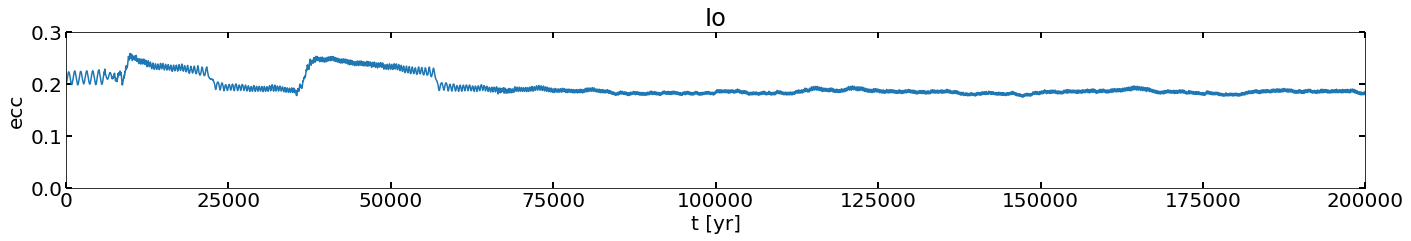

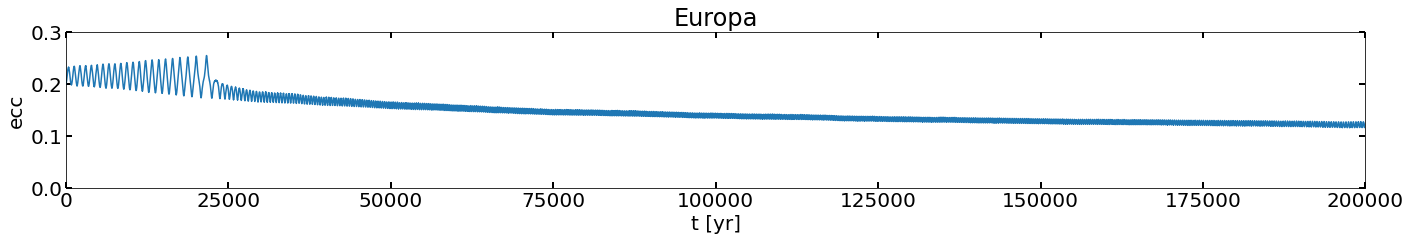

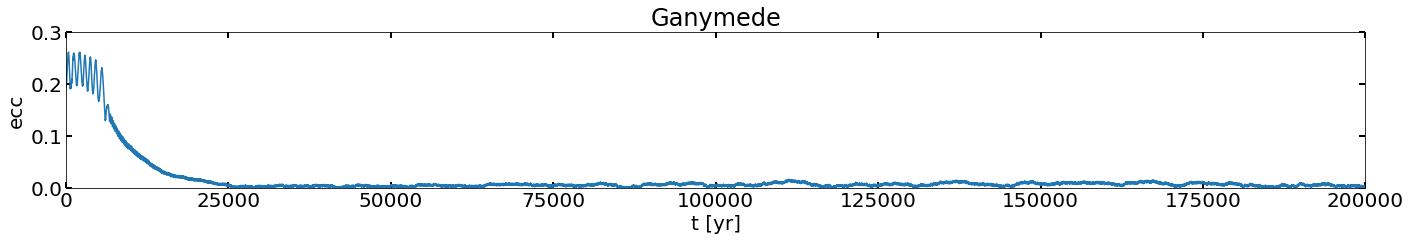

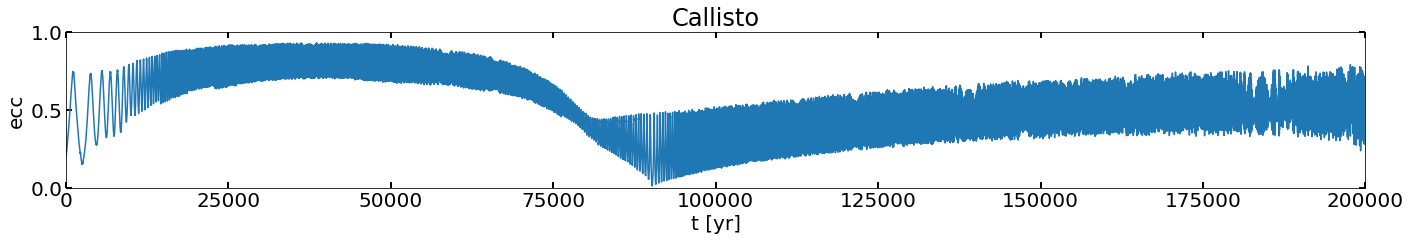

In [7]:
def plot_moon_tidal_only(moon, xmax=1e6, save=False, ecc_range=None):
    
    if moon == 'io':
        full_name = 'Io'
    elif moon == 'eu':
        full_name = 'Europa'
    elif moon == 'ga':
        full_name = 'Ganymede'
    elif moon == 'ca':
        full_name = 'Callisto'
        
    res = h5py.File(moon+'.hdf5', 'r')
    
    ecc = res['ecc'][:]
    time_range = res['time'][:]
    
    plt.rcParams.update({'font.size': 20})
    fig, ax1 = plt.subplots(1, 1, figsize=[20, 3.75], tight_layout=True)
    
    ax1.plot(time_range, ecc)   
    ax1.set_ylabel('ecc')
    ax1.set_xlabel('t [yr]')
    ax1.set_title(full_name)
    ax1.set_xlim(0,xmax)
    ax1.tick_params(direction='in', length=6, width=2, top=True, right=True)
    
    if ecc_range != None:
        ax1.set_ylim(ecc_range)
        
    if save:
        file_name = moon+'_kozai_tidal.png'
        plt.savefig(file_name)
    
    plt.show()
    res.close()
    

xmax = 2e5 # Change this to plot over a larger timescale and show more of the data (maximum of 5e6)

plot_moon_tidal_only('io', xmax=xmax, ecc_range=[0,0.3])
plot_moon_tidal_only('eu', xmax=xmax, ecc_range=[0,0.3])
plot_moon_tidal_only('ga', xmax=xmax, ecc_range=[0,0.3])
plot_moon_tidal_only('ca', xmax=xmax, ecc_range=[0,1])

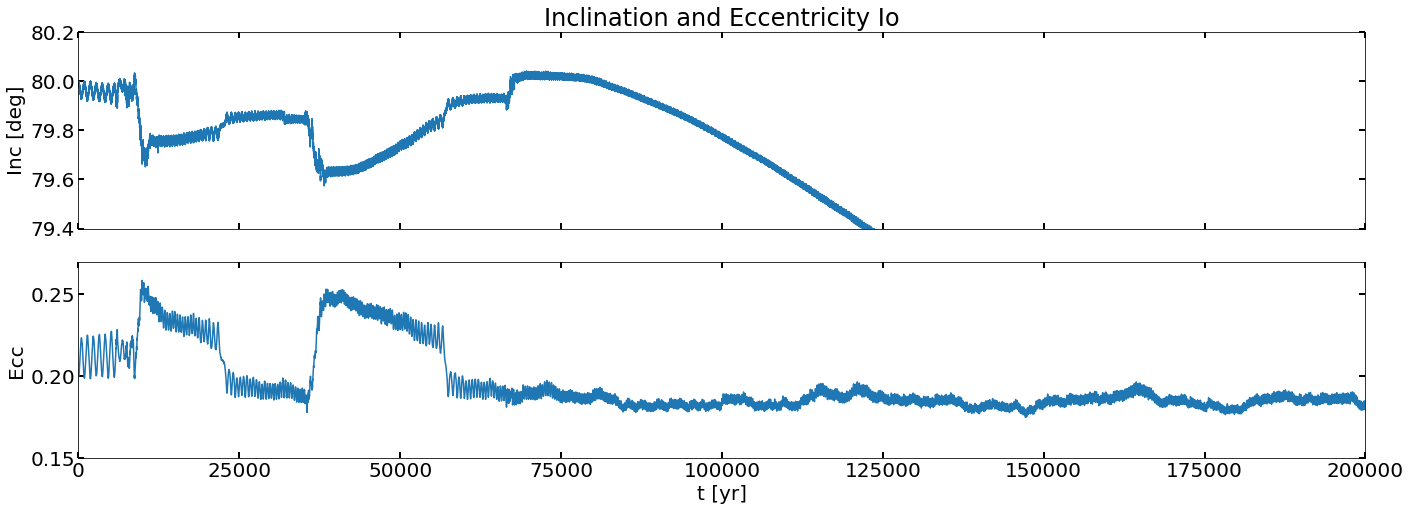

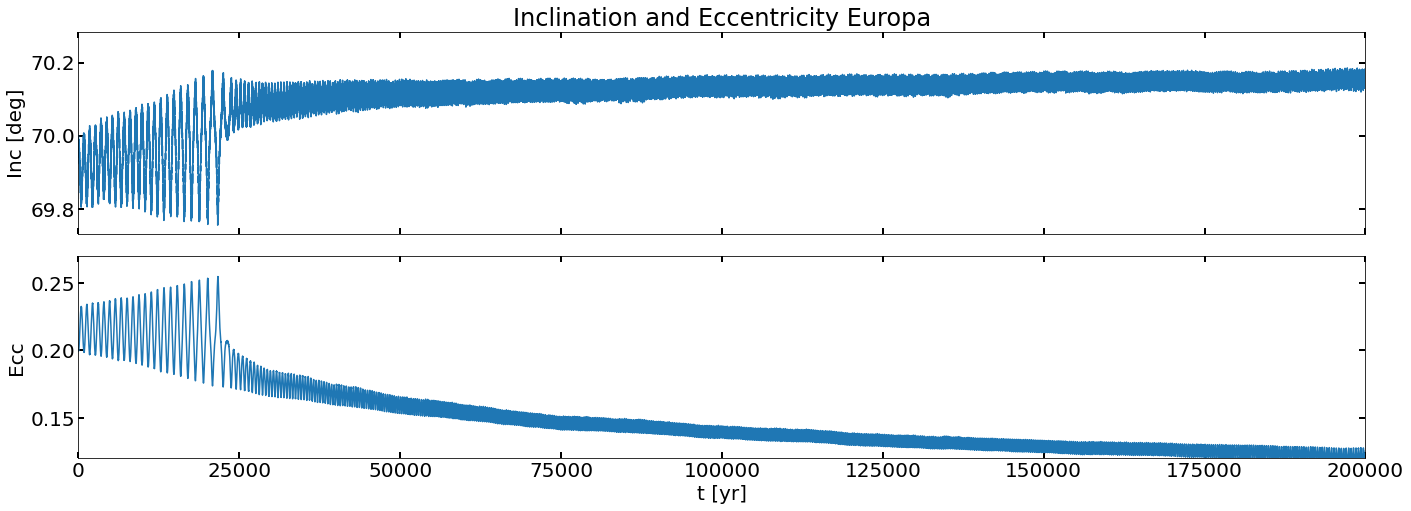

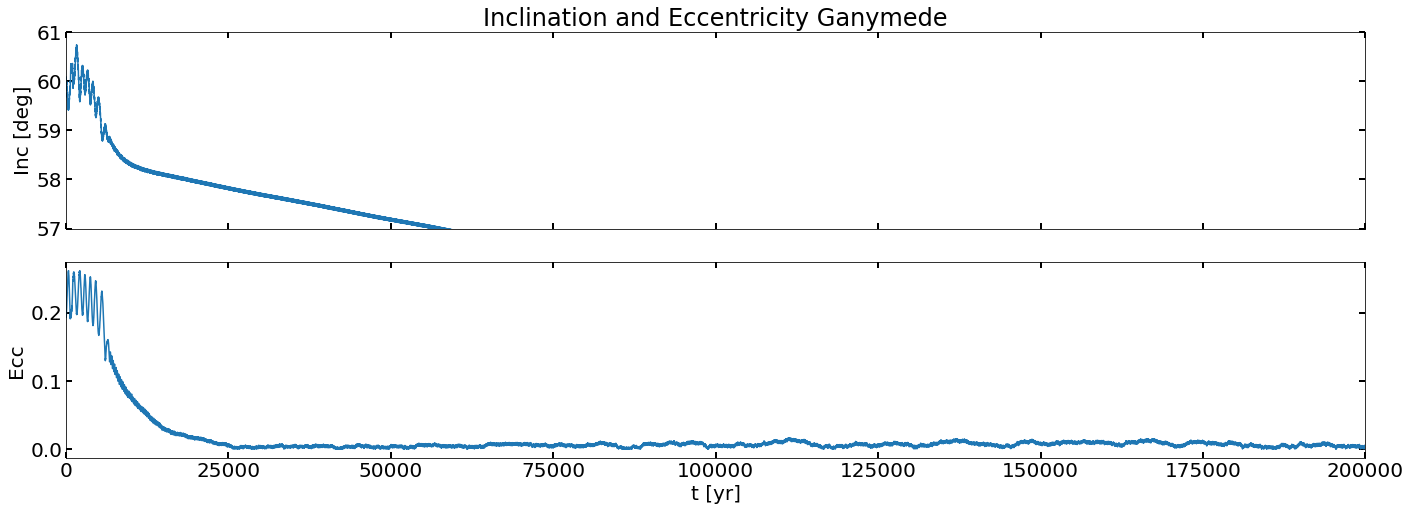

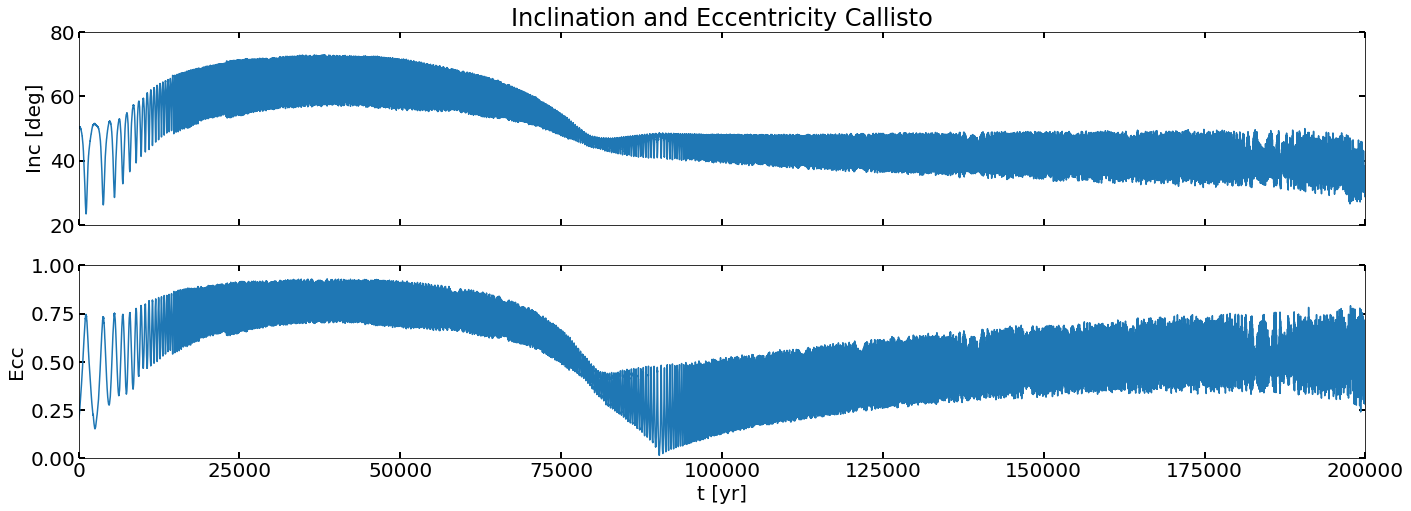

In [9]:
def plot_moon_with_kozai(moon, xmax=1e6, inc_range=None, ecc_range=None, save=False):

    if moon == 'io':
        full_name = 'Io'
    elif moon == 'eu':
        full_name = 'Europa'
    elif moon == 'ga':
        full_name = 'Ganymede'
    elif moon == 'ca':
        full_name = 'Callisto'
    
    res = h5py.File(moon+'.hdf5', 'r')
    
    ecc = res['ecc'][:]
    inc = res['inc'][:]
    time_range = res['time'][:]
    
    plt.rcParams.update({'font.size': 20})
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[20, 7.5], tight_layout=True, sharex=True)
    
    ax1.plot(time_range, inc)   
    ax1.set_ylabel('Inc [deg]')
    ax1.set_title('Inclination and Eccentricity '+full_name)
    ax1.set_xlim(0,xmax)
    ax1.tick_params(direction='in', length=6, width=2, top=True, right=True)
    if inc_range != None:
        ax1.set_ylim(inc_range)
    
    ax2.plot(time_range, ecc)   
    ax2.set_ylabel('Ecc')
    ax2.set_xlabel('t [yr]')
    ax2.set_xlim(0,xmax)
    ax2.tick_params(direction='in', length=6, width=2, top=True, right=True)
    if ecc_range != None:
        ax2.set_ylim(ecc_range)
    
    if save:
        file_name = moon+'_kozai_tidal.png'
        plt.savefig(file_name)
    
    plt.show()
    res.close()
    
plot_moon_with_kozai('io', xmax=xmax, inc_range=(79.4,80.2),ecc_range=(0.15,0.27))
plot_moon_with_kozai('eu', xmax=xmax, ecc_range=(0.12,0.27))
plot_moon_with_kozai('ga', xmax=xmax, inc_range=(57,61))
plot_moon_with_kozai('ca', xmax=xmax, inc_range=(20,80), ecc_range=(0,1))

In [ ]:
""" Please follow the following link to download the data file for this simulation:

    https://drive.google.com/file/d/1vGmA4sYws2uRDeZeVSoh3l73wR6N-2FU/view?usp=sharing
    
    The file was too large to upload to our Github repo (245 Mb).
    
    Add this file to the directory which contains this Jupyter notebook. """;


def LK_tidal_full_system(savefig=False):
    
    res = h5py.File('full_simulation.hdf5', 'r')
    
    plt.rcParams.update({'font.size': 25})
    fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(25, 12), tight_layout=True, sharex=True)
    
    moons = list(res.keys())
    moons.reverse()
    props = list(res[moons[0]].keys()),
    time = res[moons[0]][props[3]][:]
    
    labels = ['Io', 'Europa', 'Ganymede', 'Callisto']
    lines = ['-', '--', '-.', ':']
    cb = ['tab:purple', 'deepskyblue', 'tab:red', 'k']
    
    for i in range(4):
    
        ecc = res[moons[i]][props[0]][:]
        inc = res[moons[i]][props[1]][:]
    
        ax1.plot(time, ecc, label=labels[i], c=cb[i], lw=2)
        ax2.plot(time, inc, label=labels[i], c=cb[i], lw=2)
    
        ax1.set_ylabel('eccentricity', labelpad=10)
        ax2.set_ylabel('inclination [deg]', labelpad=10)

        ax1.set_xlim([0,1000])
        ax1.set_ylim([0,0.6])
        ax2.set_xlim([0,1000])

        ax1.set_title('LK and Tidal Interactions', pad=10)
        ax2.set_xlabel('time [yr]')
        ax1.tick_params(direction='in', length=6, width=2, top=True, right=True)
        ax2.tick_params(direction='in', length=6, width=2, top=True, right=True)

        ax1.legend(loc=2)
        ax2.legend(loc=3)
            
        if savefig:
            plt.savefig('dt_porb.png', dpi=300, facecolor='w')
            
    plt.show()
    res.close()
        

LK_tidal_full_system()